# Titanic tutorial

The following document uses the Titanic dataset from Kaggle to do an exploratory analysis and initial machine-learning model building using Python. 

### Importing the libraries, getting the data and initial view
To start off we import the libraries required for the analysis.

* The pandas library for data manipulation and transformation
* Matplotlib and seaborn are used for graphing the data
* Sklearn package is used for preprocessing of the data as well as building the actual models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('whitegrid')

We first need to load the data required to perform the analysis. Note that using pandas, this data is loaded as a dataframe which makes the following exploration and manipulation much simpler.

In [2]:
train=pd.read_csv("C:/Users/Sonja/Documents/Python/Dataset/train.csv")

In [3]:
type(train)

pandas.core.frame.DataFrame

The next few lines show us some descriptive information about the dataset loaded. To show the first and last 5 rows of the data, we use the .head() and .tail() methods.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


To understand how many rows and columns the dataframe has, we call the attribute .shape on our data. Note: because .shape is an attribute of the dataframe, it does not require parenthesis.

In [6]:
train.shape

(891, 12)

We can understand more about the dataset by calling the .count(), .info() and .describe() methods. These gives us the counts, types and descriptive statistics of the data. We can already see which of the columns have missing values, by the counts included below. The .info method also shows us what type of data each of the columns is, giving us an idea if any of them need to be transformed before being able to work on them. 

In [7]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Mr. Anders Johan",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can also call any of these methods on a specific column, which is by itself a Series/Dataframe.

In [10]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Finding missing values in the dataset

An important step of preprocessing the data before it can be used for analysis is to find which columns and rows have missing values and dealing with these missing values appropriately. We first want to find out which columns have missing values. To the extent a column has too many missing values, it probably makes most sense to drop the column entirely. If there are only a few missing values, the general approach would be 
* Drop the rows which include missing values
* If the variable is continuous, fill it with the mean or median of tha column
* If the variable is categorical, fill it with the most frequent value of the column

In [11]:
missings=train.isnull().sum()
missings

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the variable Cabin has 687 missing values. It probably makes most sense to drop the variable from the dataset. The below plot shows the same data.

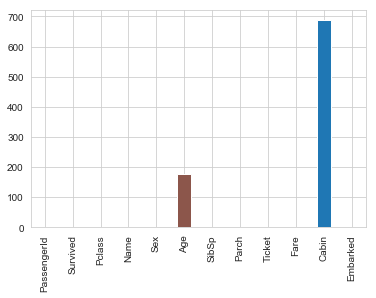

In [12]:
missings.plot.bar()
plt.show()

We can drop the column using the .drop method.

In [13]:
train = train.drop(["Cabin"], axis=1)

Now we need to deal with the missing values in the Age and the Embarked categories. We will drop the rows containing the missing values in the Embarked variable from the dataset. We will then fill the missing values of the Age category with the mean of the column. (Probably not the best method, but want to show the code...)

In [14]:
train = train.dropna(subset=["Embarked"], axis=0)

In [15]:
mean= train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)
train.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

Can also use .replace to fill missing values with the mean, such as this: train["Age"].replace(np.nan, mean, inplace=True).

### Looking at the data - Groupby

For categorical variables, it often makes sense to group the data into the categories to analyse the information further. We therefore look at the means of the various columns, grouped into categories.


In [16]:
train.groupby(["Pclass","Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.717391  0.967391  33.791074  0.565217  0.467391   
       male     455.729508  0.368852  39.277901  0.311475  0.278689   
2      female   443.105263  0.921053  28.747160  0.486842  0.605263   
       male     447.962963  0.157407  30.649156  0.342593  0.222222   
3      female   399.729167  0.500000  24.051860  0.895833  0.798611   
       male     455.515850  0.135447  27.356705  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.693750  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [17]:
train[["Survived","Sex"]].groupby(["Sex"]).count()

,Survived
Sex,
female,312
male,577


### Exploratory analysis - Graphing the data

There are a number of packages that allow you to plot data - the two loaded are matplotlib and seaborn. When thinking what plot to graph, there are two things that need to be considered 
1. Is the data continuous or categorical?
2. How many variables are you wanting to plot - univariate, bivariate or multivariate?

#### Univariate graphs

##### Categorical variables
To plot a univariate categorical variable, you would plot a frequency bar graph. 


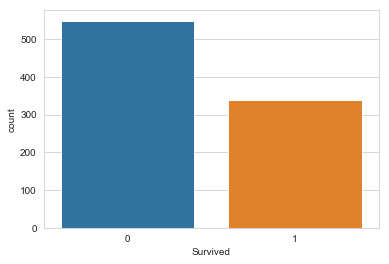

In [18]:
sns.countplot(x="Survived", data=train)
plt.show()

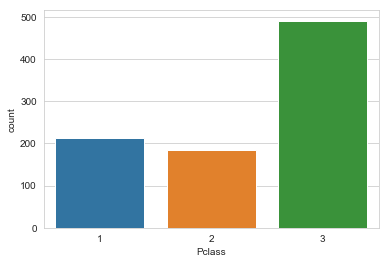

In [19]:
sns.countplot(x="Pclass", data=train)
plt.show()


##### Continuous variables
To plot a univariate continuous variable, you would plot a histogram, also known as a distribution plot.

C:\Users\Sonja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


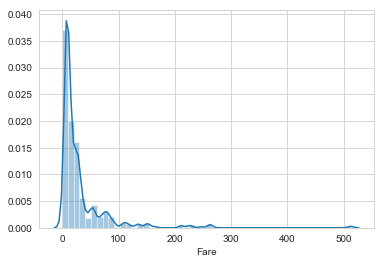

In [20]:
sns.distplot(train["Fare"])
plt.show()

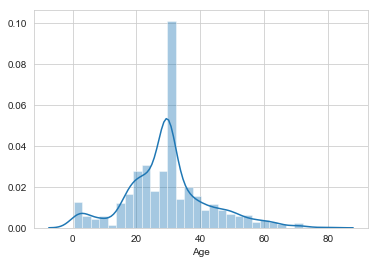

In [21]:
sns.distplot(train["Age"])
plt.show()

We can convert a continuous variable into a categorical one by binning it into groups as below. In this case, we have added the "Age_grouped" variable onto the dataframe. 

In [22]:
train["Age_grouped"]= pd.cut(train["Age"], np.arange(0,90,10))
train["Age_grouped"].head()

0    (20, 30]
1    (30, 40]
2    (20, 30]
3    (30, 40]
4    (30, 40]
Name: Age_grouped, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

We can now plot it as a categorical variable. Note that the syntax for the below graph is different to the bar graphs above (both work), but rather similar to the histogram syntax.

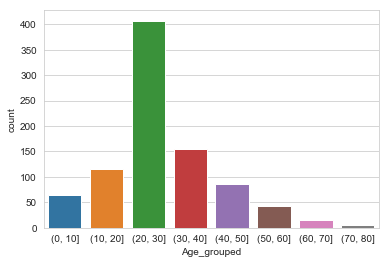

In [23]:
sns.countplot(train["Age_grouped"])

#### Bivariate graphs

##### Categorical variables

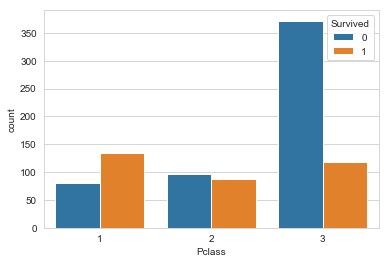

In [24]:
sns.countplot("Pclass", data=train, hue="Survived")
plt.show()

##### Continuous variables

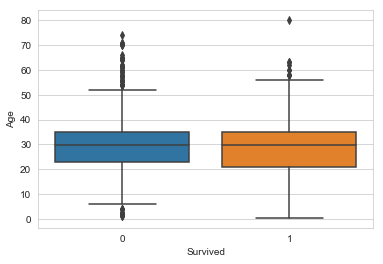

In [25]:
sns.boxplot(x="Survived", y="Age", data=train)

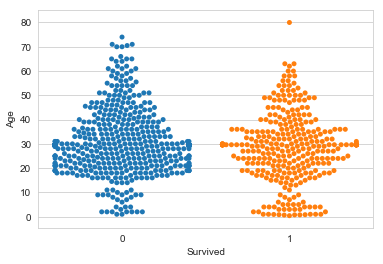

In [26]:
sns.swarmplot(x="Survived", y="Age", data=train)

In [27]:
age_grouping=train.groupby("Age_grouped").mean()

In [28]:
age_grouping

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age_grouped,,,,,,,
"(0, 10]",430.843750,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",447.660870,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",431.683047,0.334152,2.479115,27.258355,0.427518,0.213759,25.632952
"(30, 40]",471.331169,0.441558,2.097403,35.032468,0.376623,0.396104,42.252568
"(40, 50]",483.500000,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
"(50, 60]",449.809524,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
"(60, 70]",405.937500,0.187500,1.562500,64.000000,0.187500,0.375000,43.780206
"(70, 80]",438.200000,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


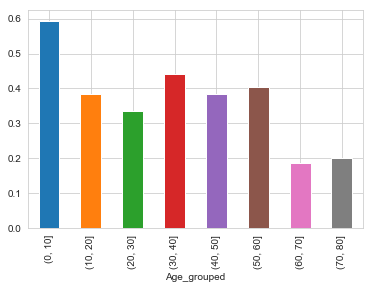

In [29]:
age_grouping["Survived"].plot.bar()

##### Continuous variables - Scatterplots

C:\Users\Sonja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


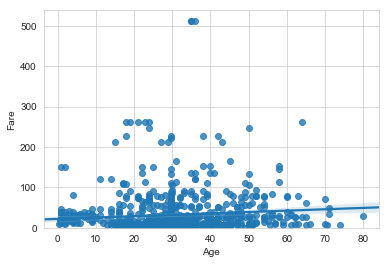

In [30]:
sns.regplot(x="Age", y="Fare", data=train)
plt.ylim(0,)
plt.show()

Another interesting plot is the jointplot showing the scatterplot, together with the histograms for the two consinuous variables.

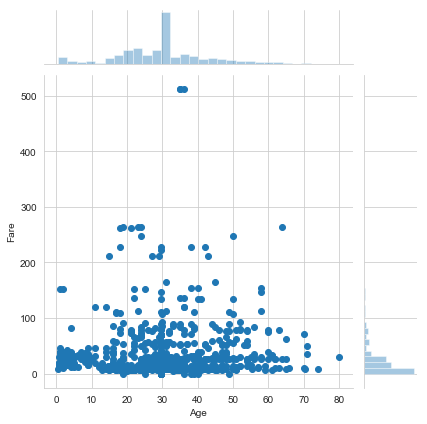

In [31]:
sns.jointplot(x="Age",y="Fare",data=train)

##### Heatmaps

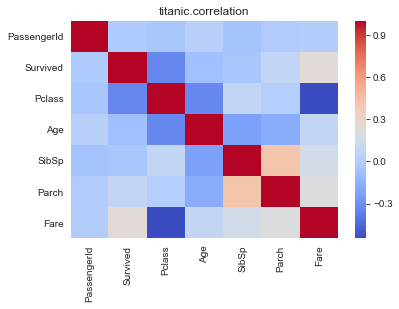

In [32]:
tc = train.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.correlation')
plt.show()

##### Facet grids

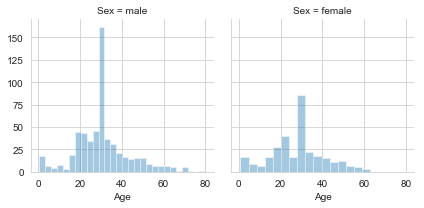

In [33]:
g = sns.FacetGrid(data=train, col='Sex')
g.map(sns.distplot, 'Age',kde=False)
plt.show()

### Preprocessing

#### Encoding categorical variables

Most machine learning models do not work well with categorical variables, and as such these categorical variables would need to be converted into dummy variables before any machine learning methods can be applied to the data. There are a number of ways this can be done using different packages. The below uses the sklearn package for encoding categorical variables.

In [34]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    processed_df = processed_df.drop(['Name','Ticket'],axis=1)
    return processed_df

train = preprocess_titanic_df(train)

### Models

#### Linear regression

Even though we are wanting to predict who survived, in order to show how linear regression works, I will perform linear regression on the continuous variables, i.e. trying to predict the Fare a person paid, depending on the age of the person.

In [35]:
lin = LinearRegression()
X=train[["Age"]]
Y=train["Fare"]
lin.fit(X,Y)
Yhat=lin.predict(X)

We can print the intercept, the coefficient, the mean squared error and the R squared using the following commands:

In [36]:
print(lin.intercept_)
print(lin.coef_)
print(mean_squared_error(Y,Yhat))
print(lin.score(X,Y))

22.01173897723197
[0.34022368]
2447.618641714286
0.007881867263402564


To correct for overfitting, we want to perform cross validation on our model. The following outputs the mean R squared after 3-fold cross validation.

In [37]:
scores=cross_val_score(lin, X,Y, cv=3)
np.mean(scores)

0.0009387590857448854

In [38]:
yhat = cross_val_score(lin, X, Y, cv=3)

#### Multiple linear regression

We can use linear regression using more than one predictor variables. I will add the variable 'Sex' into the equation.

In [39]:
lin2 = LinearRegression()
X2=train[["Age", "Sex"]]
Y2=train["Fare"]
lin2.fit(X2,Y2)
Yhat=lin2.predict(X2)

C:\Users\Sonja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


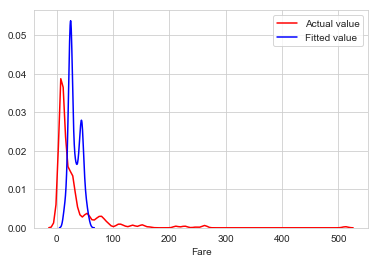

In [40]:
sns.distplot(Y2,hist=False,color='r', label="Actual value")
sns.distplot(Yhat, hist=False, color='b', label="Fitted value")
plt.show()

In [41]:
train_s=train[train["Survived"]==1]

#### Building a decision tree

We can build a decision tree to predict who survived and who did not

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_grouped
0,1,0,3,1,22.0,1,0,7.2500,2,"(20, 30]"
1,2,1,1,0,38.0,1,0,71.2833,0,"(30, 40]"
2,3,1,3,0,26.0,0,0,7.9250,2,"(20, 30]"
3,4,1,1,0,35.0,1,0,53.1000,2,"(30, 40]"
4,5,0,3,1,35.0,0,0,8.0500,2,"(30, 40]"


In [47]:
x=train.drop(["Survived","Age_grouped"], axis=1)
y=train["Survived"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [49]:
clf_dt=tree.DecisionTreeClassifier(max_depth=10)

In [50]:
clf_dt.fit(x_train, y_train)
clf_dt.score(x_test,y_test)

0.7752808988764045

In [51]:
clf_dt.score(x_train, y_train)

0.9563994374120957

In [52]:
clf_dt.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)